In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('penguan_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.8+ KB


In [6]:
X= pd.get_dummies(df.drop('species' , axis=1) , drop_first=True)
y = df['species']

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test =train_test_split(X , y , test_size=0.3 , random_state=101)

# n_estimator تعداد درختان | max_features تعداد ویژگی ها | random_state 

In [10]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10 , random_state=101 , max_features='sqrt')

In [11]:
model.fit(X_train , y_train)
y_pred=model.predict(X_test)

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score

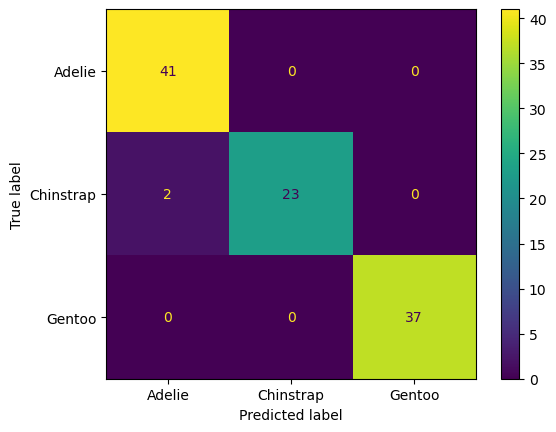

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)

In [14]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.92      0.96        25
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       103
   macro avg       0.98      0.97      0.98       103
weighted avg       0.98      0.98      0.98       103



In [17]:
pd.DataFrame(index=X.columns , data= model.feature_importances_ , columns=['feature importance'])

,feature importance
culmen_length_mm,0.355721
culmen_depth_mm,0.093365
flipper_length_mm,0.266928
body_mass_g,0.181709
island_Dream,0.098670
island_Torgersen,0.003019
sex_MALE,0.000589


In [19]:
test_error=[]
for n in range(1,41):
    model=RandomForestClassifier(n_estimators=n , max_features='sqrt' , random_state=101)
    model.fit(X_train , y_train)
    y_pred=model.predict(X_test)
    test_error.append(1-accuracy_score(y_test , y_pred))

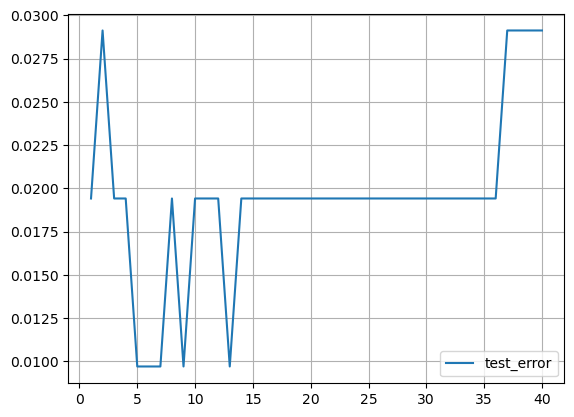

In [20]:
plt.plot(range(1 , 41) , test_error , label='test_error')
plt.legend()
plt.grid()

In [25]:
model=RandomForestClassifier(n_estimators=7 , max_features='sqrt' , random_state=101)
model.fit(X_train , y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        25
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       103
   macro avg       0.99      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



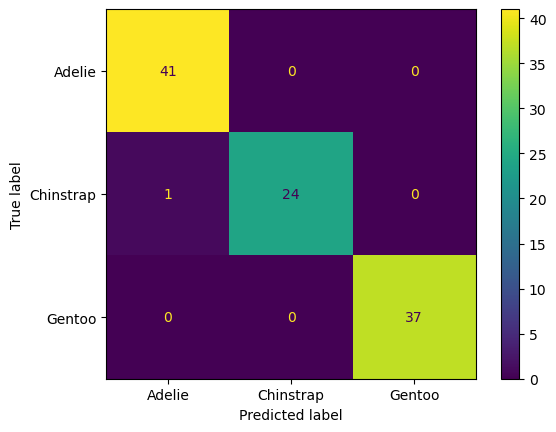

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)